In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv(r"data\raw\amz_uk_price_prediction_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [9]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [10]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [12]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [13]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [43]:
df_categorical= df[["asin","title","category","stars","isBestSeller"]]
df_numerical = df[["uid","reviews", "price","boughtInLastMonth"]]

In [14]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Punto 1

In [ ]:
# TABLAS DE FREQUENCIA 1.1
frequency_table= df['category'].value_counts()

In [35]:
#TABLAS DE FREQUENCIAS 1.2
df_top5_category=frequency_table[:5]

In [ ]:
#2 VISUALIZACIONES

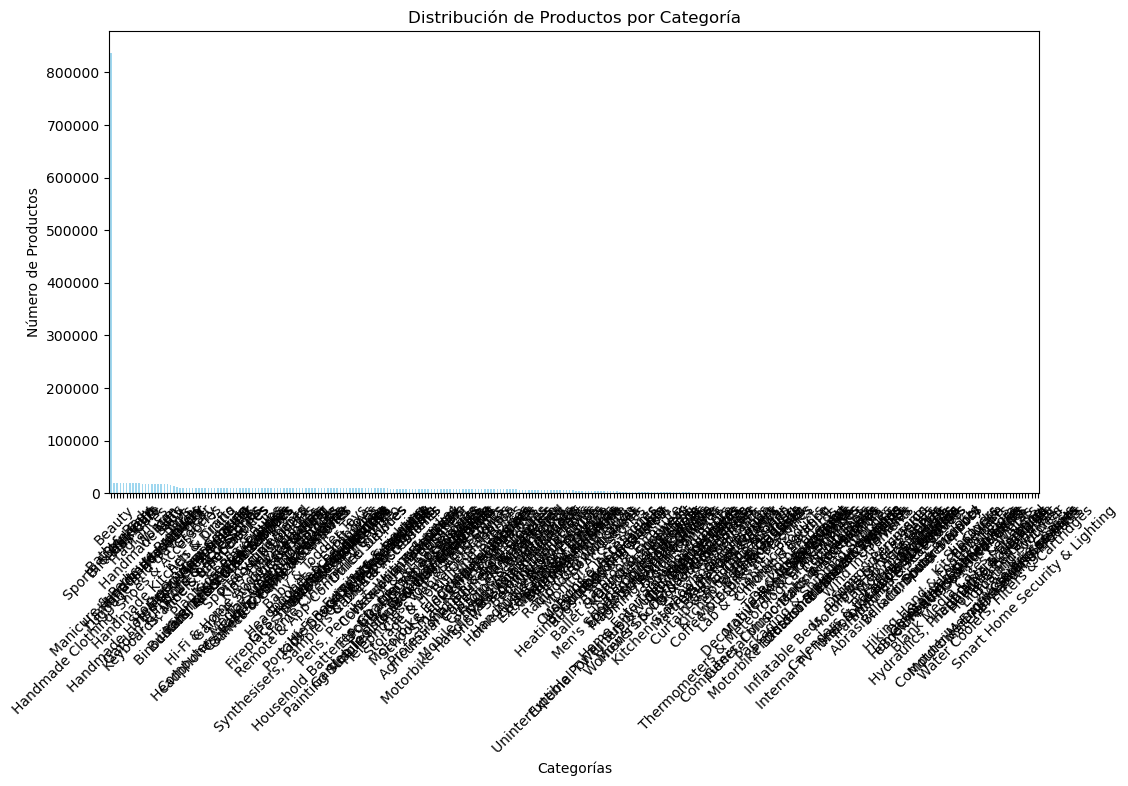

In [37]:
# Gráfico de Barras: Distribución completa o un subconjunto
plt.figure(figsize=(12, 6))
frequency_table.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Distribución de Productos por Categoría")
plt.xlabel("Categorías")
plt.ylabel("Número de Productos")
plt.xticks(rotation=45)
plt.show()


C:\Users\est_c\AppData\Local\Temp\ipykernel_12272\3956559203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1000x600 with 0 Axes>

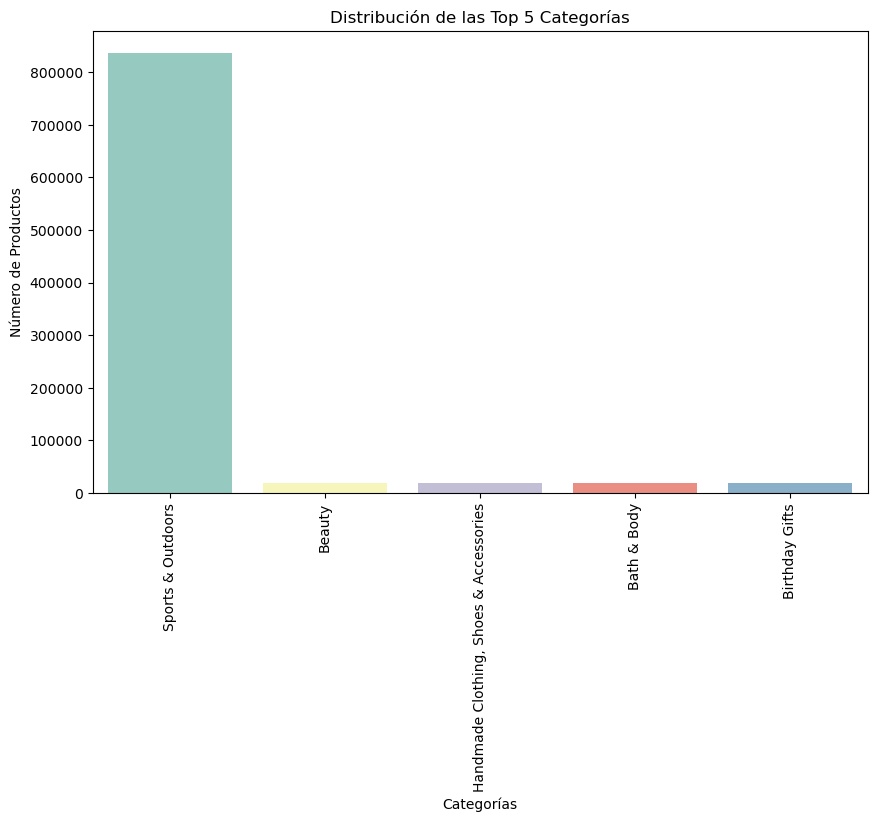

In [ ]:
#TOP 5 CATEGORIAS
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df_top5_category.index,
    y=df_top5_category.values,
    palette="Set3"
)
plt.title("Distribución de las Top 5 Categorías")
plt.xlabel("Categorías")
plt.ylabel("Número de Productos")
plt.xticks(rotation=90)
plt.show()

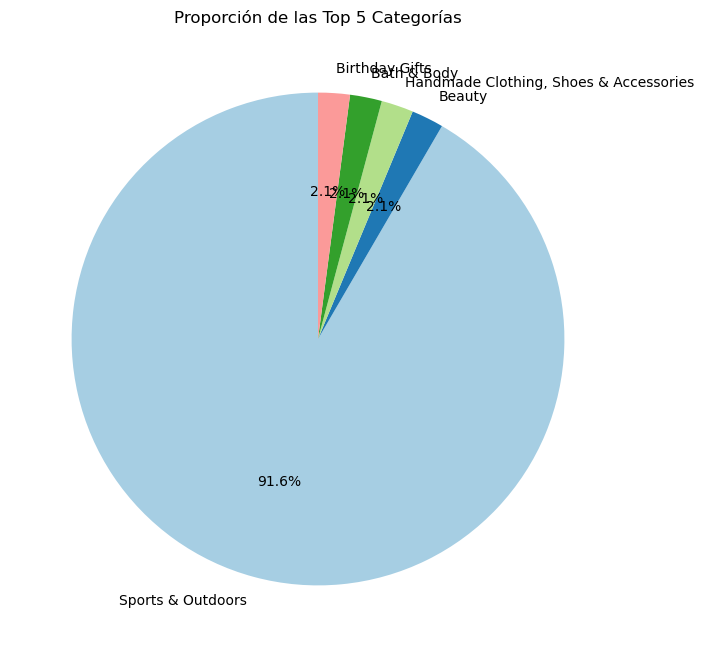

In [38]:
# Paso 2: Gráfico de Pastel para las Top 5 categorías
plt.figure(figsize=(8, 8))
df_top5_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Proporción de las Top 5 Categorías")
plt.ylabel("")  # Opcional: elimina el texto 'category' del eje Y
plt.show()

2-1-Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [45]:
df_numerical["price"].mean()

89.24380943923663

In [46]:
df_numerical["price"].mode()

0    9.99
Name: price, dtype: float64

In [47]:
df_numerical["price"].median()

19.09

2-2-Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [51]:
df_numerical["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [52]:
skewness_price = df_numerical['price'].skew()
kurtosis_price = df_numerical['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

2-3-Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

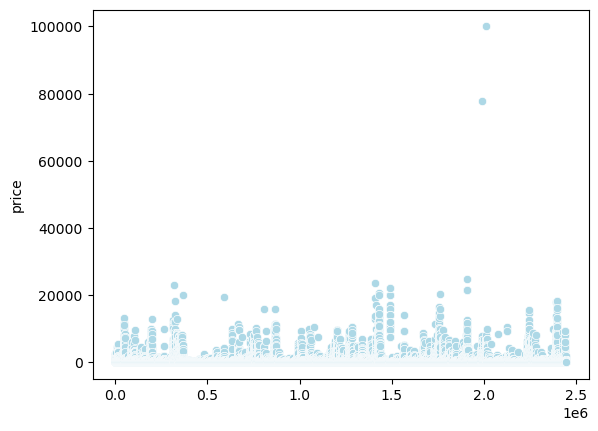

In [58]:
import matplotlib.pyplot as plt

sns.scatterplot(data = df_numerical['price'], color="lightblue")
plt.show()  # Asegura que el gráfico se muestre


Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

3-1-Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [60]:
df_categorical["stars"].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [62]:
df_categorical["stars"].mean().round(2)

2.15

In [65]:
df_categorical["stars"].median()

0.0

In [64]:
df_categorical["stars"].mode().round(2)

0    0.0
Name: stars, dtype: float64

In [66]:
df_categorical["stars"].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

3-2-Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [67]:
df_categorical["stars"].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

3-3-Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [68]:
skewness_price = df_categorical['stars'].skew()
kurtosis_price = df_categorical['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

3-4-Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

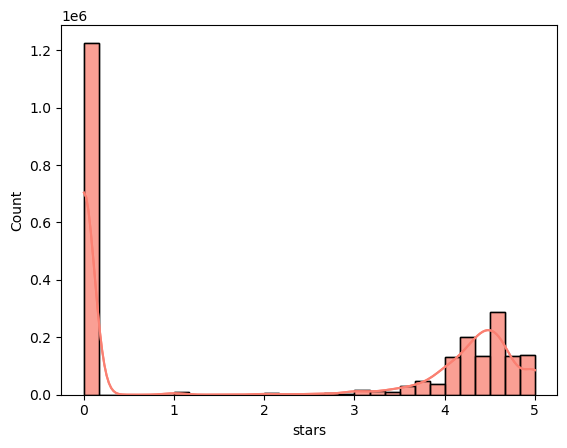

In [70]:
sns.histplot(df_categorical['stars'], kde=True, bins=30, color="salmon")
plt.show()  # Asegura que el gráfico se muestre